# Unemployment in India

## Project Introduction

### Dataset Description

The dataset used in this project contains unemployment data from India spanning between 2019 and 2020. It includes variables such as Date, Unemployment Rate (%), Employed rate, Area, and Region.

### Project Objectives

The aim of this project is to unveil insights such as:

1. How unemployment rate is affected by COVID-19.
2. The difference in employment rate between rural and urban areas.
3. Total employment distribution in India.


In [1]:
## downloading the datasets for this project. 
import opendatasets as od

od.download('https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india')

Skipping, found downloaded files in ".\unemployment-in-india" (use force=True to force download)


In [2]:
## importing libraries. 
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

mpl.style.use(['ggplot'])
print('done')

done


In [3]:
# loading the dataset 
df = pd.read_csv("unemployment-in-india/Unemployment in India.csv")
print("done")

done


### Exploring our dataset

In [4]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
## exploring our dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [6]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [7]:
## getting a list of our columns. 
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

### Cleaning the data

In [8]:
## remove extra spaces from column names 

df.columns = df.columns.str.strip()

print('Cleaned columns', df.columns)

Cleaned columns Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [9]:
## checking for missing values
df.isnull().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

In [10]:
## dropping null values from our dataset. 
df.dropna(inplace=True)

print('done')
df.isnull().sum()

done


Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

<Figure size 1200x2000 with 0 Axes>

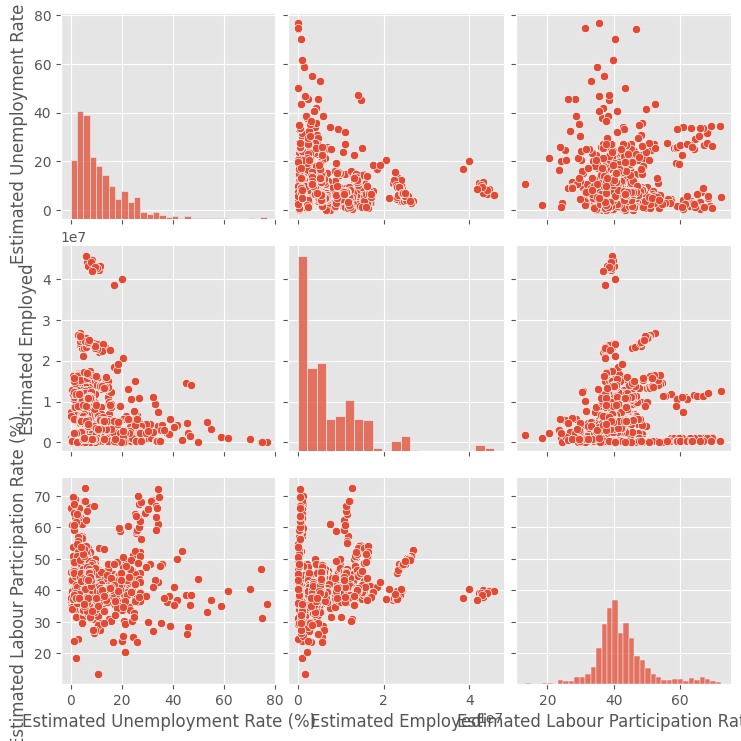

In [11]:
plt.figure(figsize=(12,20))
sns.pairplot(df)
plt.show()

### Here goes our Insights

<Axes: xlabel='Estimated Labour Participation Rate (%)', ylabel='Count'>

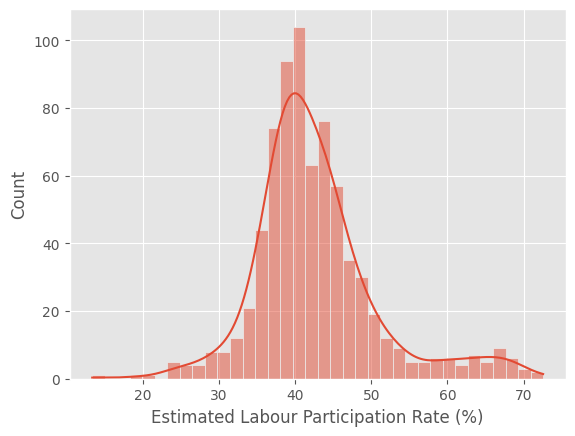

In [12]:
sns.histplot(df['Estimated Labour Participation Rate (%)'], kde=True)

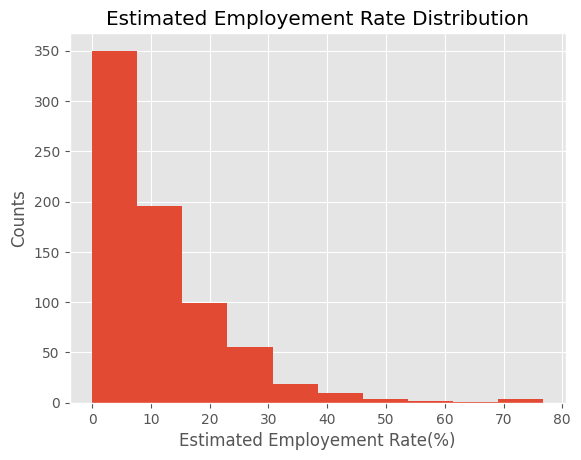

In [19]:
plt.hist(df['Estimated Unemployment Rate (%)'])
plt.title('Estimated Employement Rate Distribution')
plt.xlabel('Estimated Employement Rate(%)')
plt.ylabel('Counts')
plt.show()

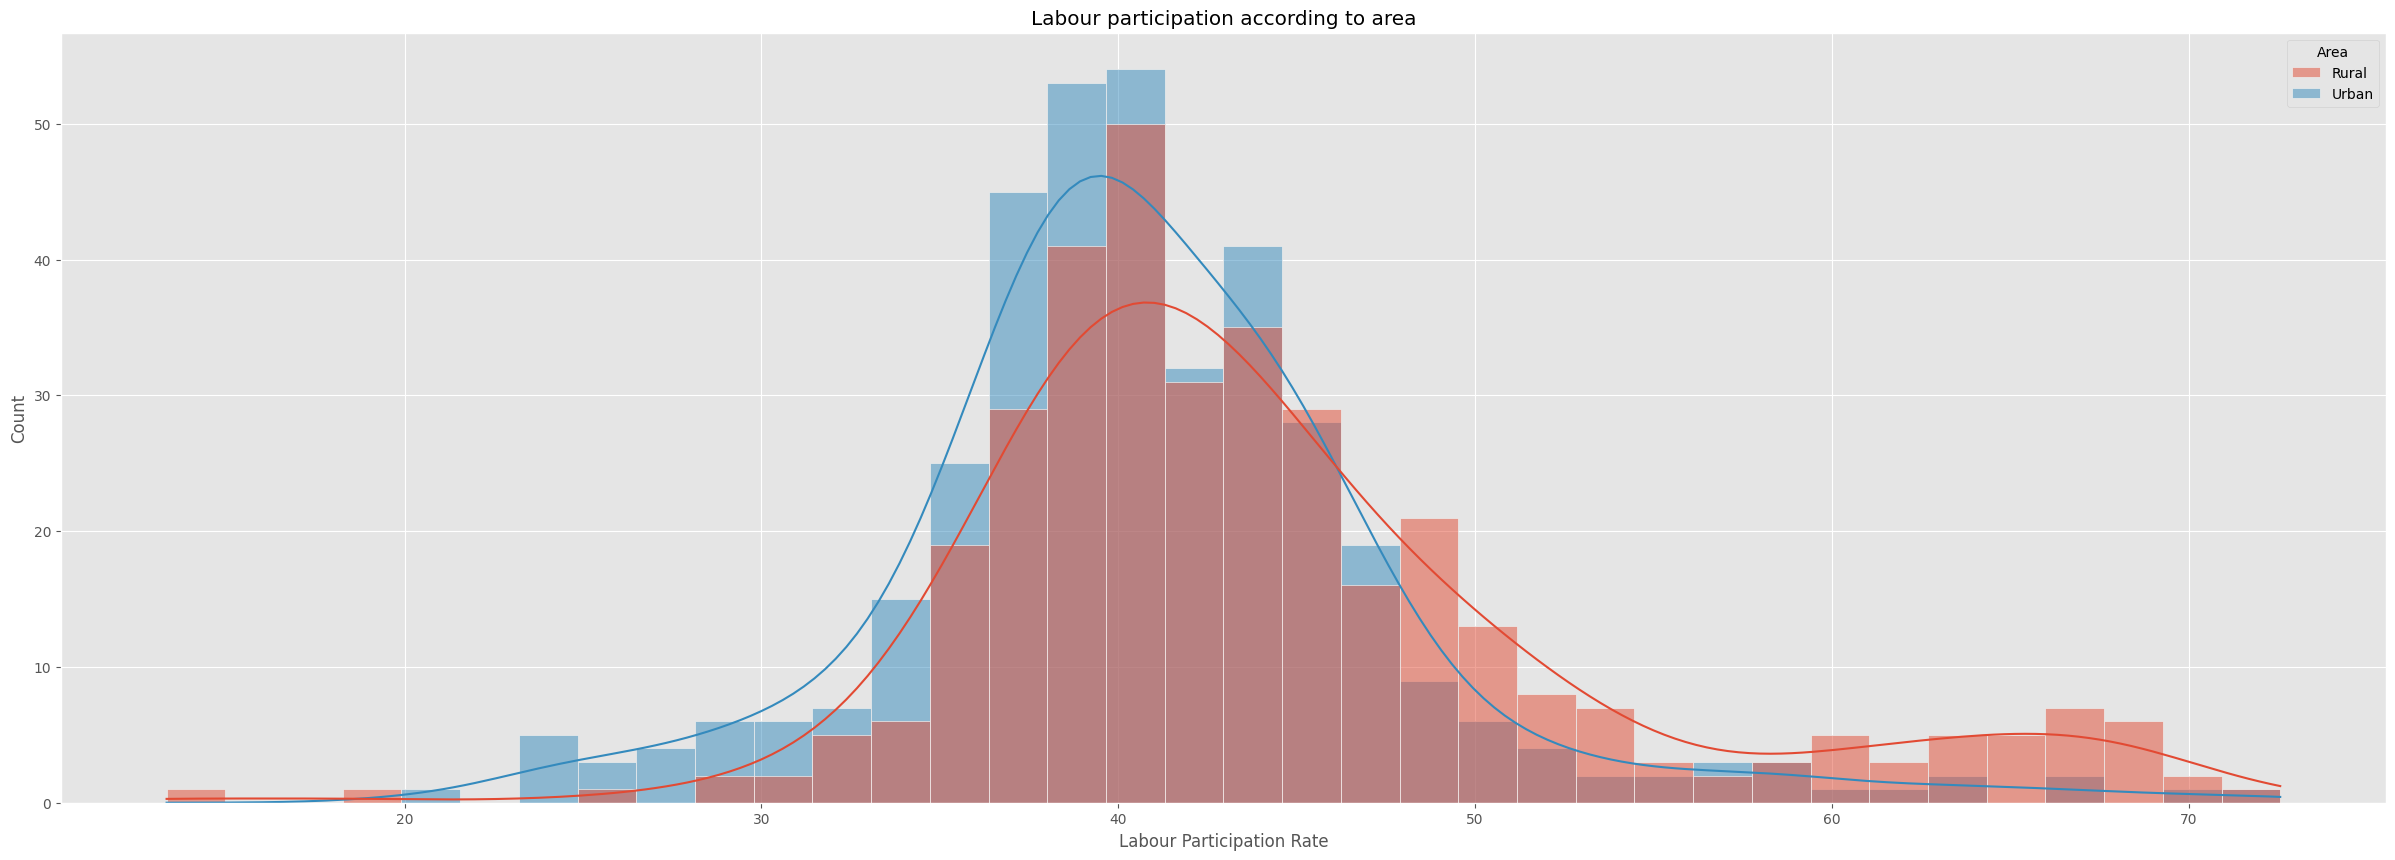

In [14]:
### labour participation by area 
plt.figure(figsize=(30, 10))
sns.histplot(x='Estimated Labour Participation Rate (%)', data=df, hue='Area', kde=True)
plt.title('Labour participation according to area')
plt.xlabel('Labour Participation Rate')
plt.show()

The plot above shows that Labour participation rates are higher in the urban areas as compared to the rural areas. 

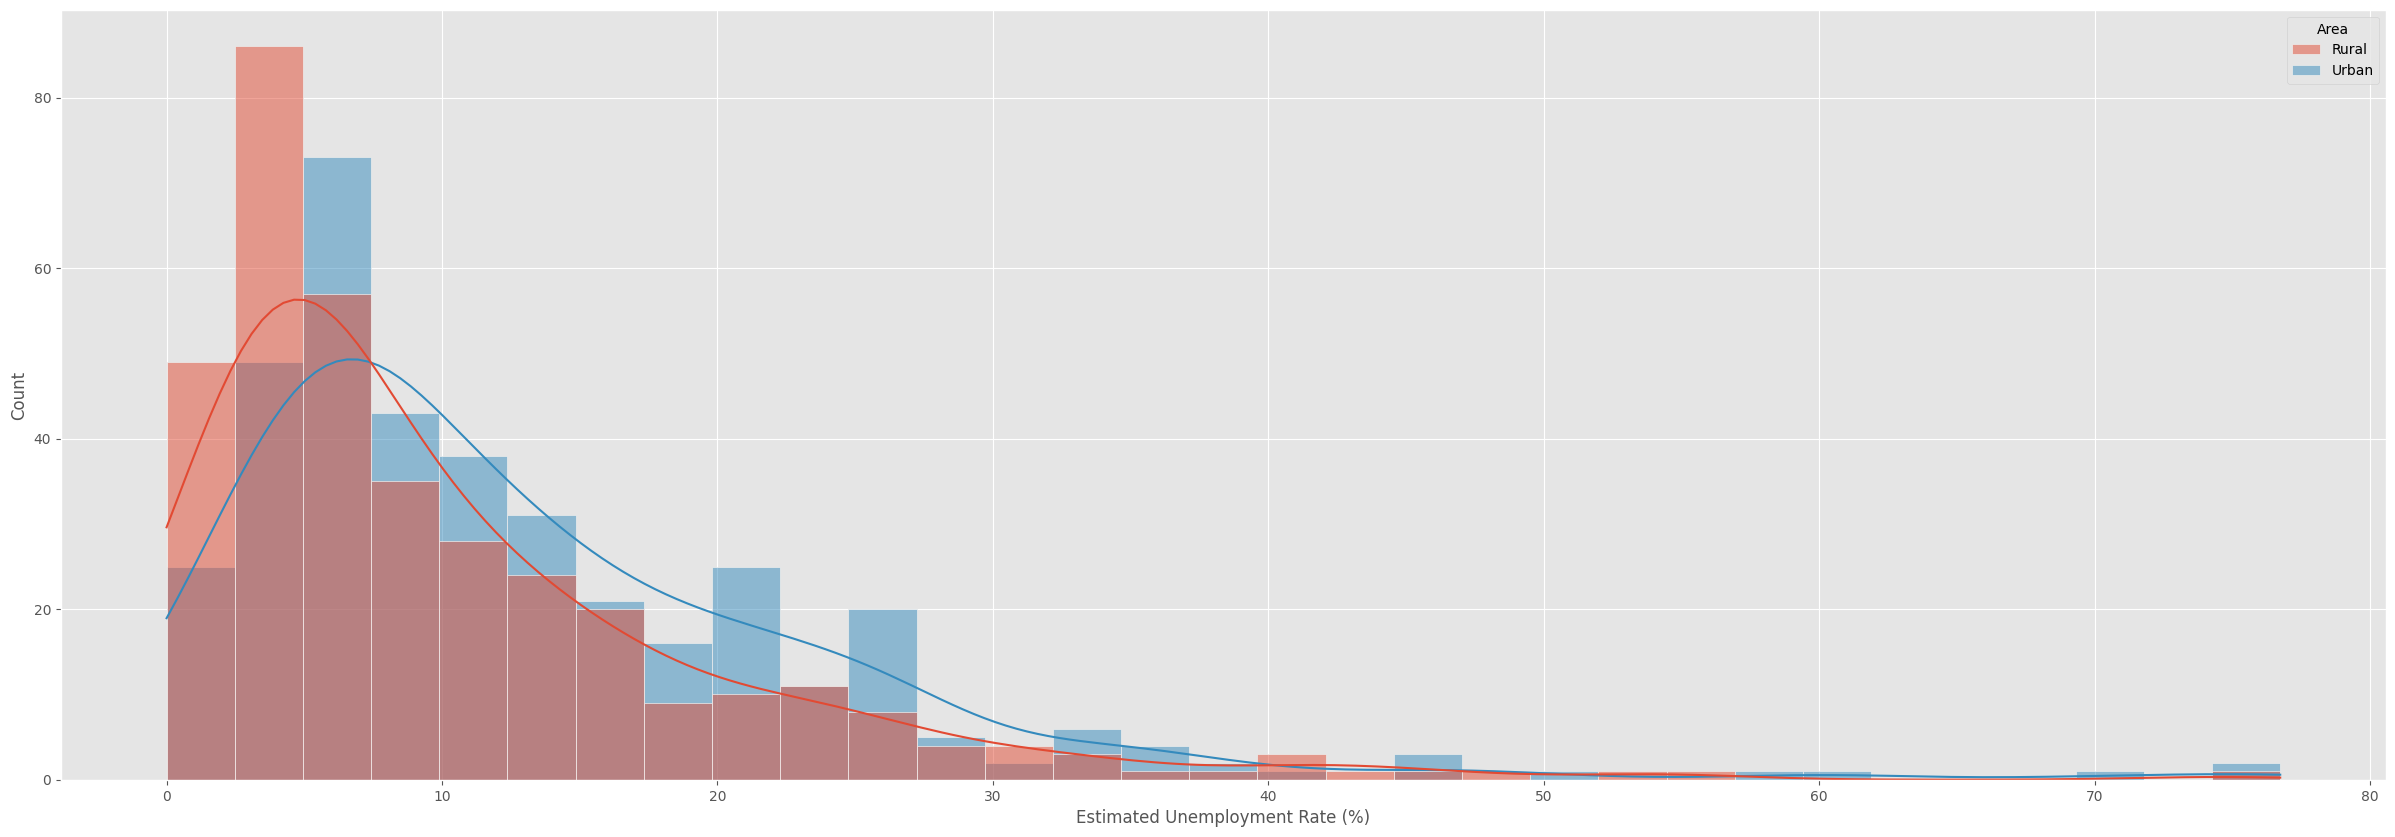

In [15]:
plt.figure(figsize=(30, 10))
sns.histplot(x='Estimated Unemployment Rate (%)', data=df, hue='Area', kde=True)
plt.show()

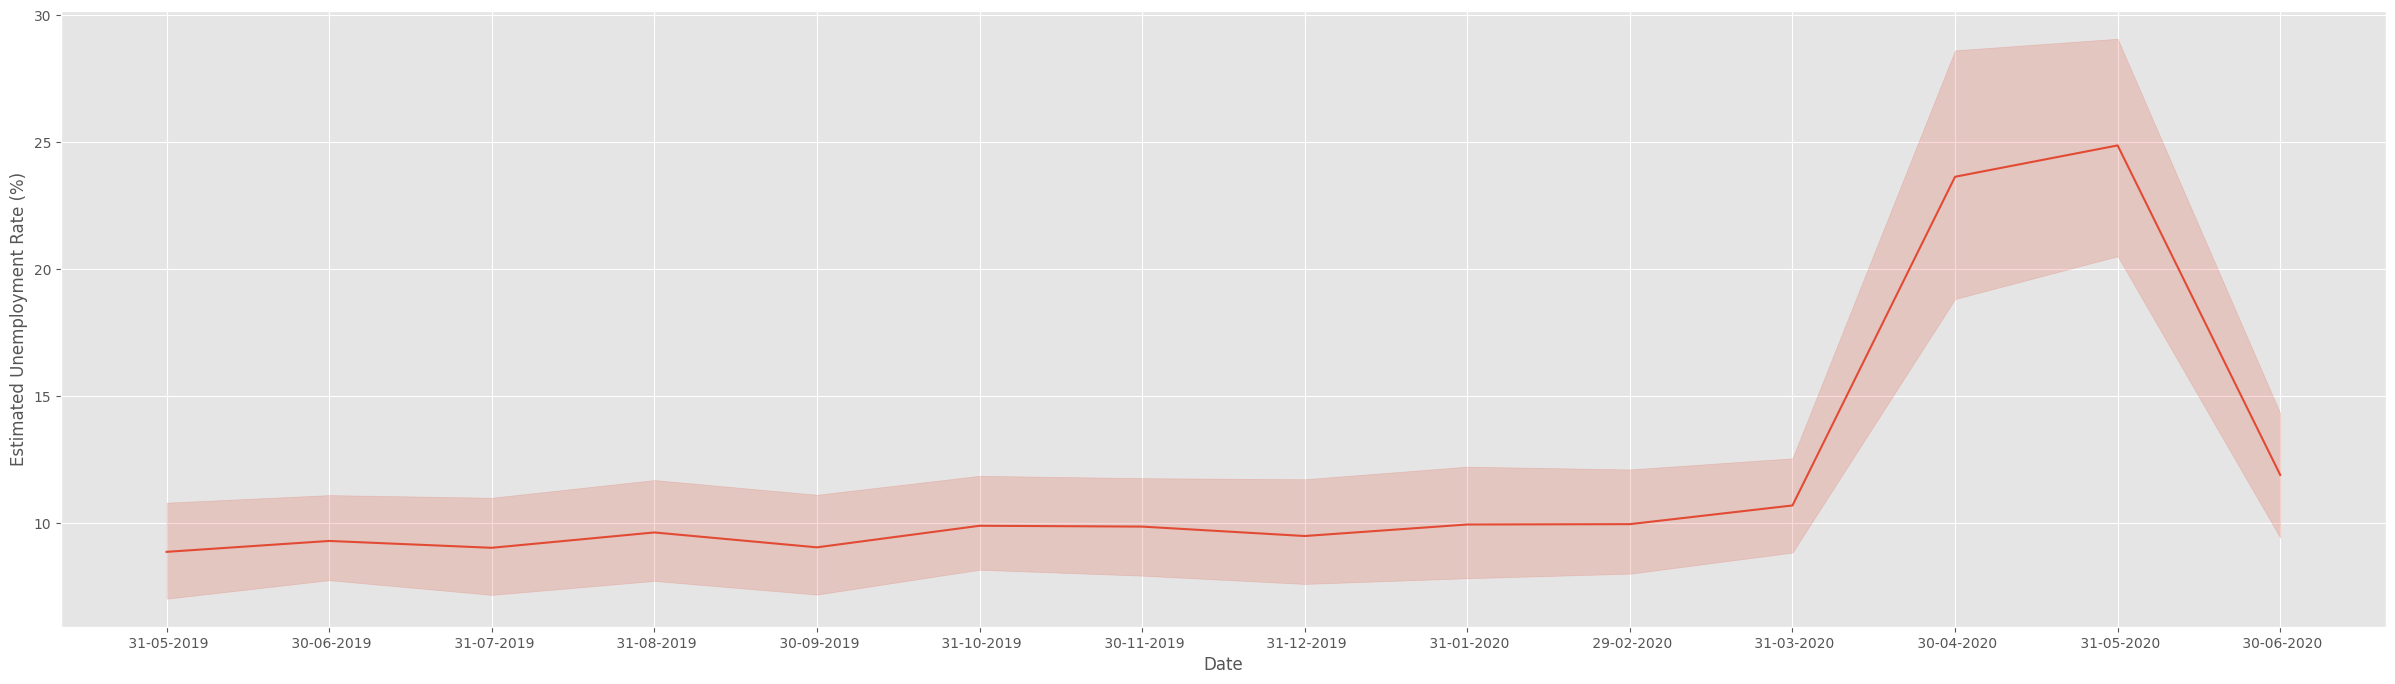

In [16]:
plt.figure(figsize=(30, 8))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)')
plt.show()

The line plot analysis reveals a significant uptick in unemployment rates following March 31, 2020. This notable increase suggests a shift in employment dynamics during this period.

Possible contributing factors to this surge in unemployment rates include:

*COVID-19 Pandemic Impact*: The sharp rise in unemployment rates coincides with the onset of the COVID-19 pandemic. The implementation of lockdown measures and economic disruptions associated with the pandemic likely led to widespread job losses and increased unemployment.

*Economic Contraction*: The pandemic-induced economic downturn might have resulted in business closures, reduced consumer demand, and layoffs across various sectors, contributing to higher unemployment rates.

Policy Responses: Government responses to contain the spread of the virus, such as restrictions on movement and economic shutdowns, could have inadvertently exacerbated unemployment levels.

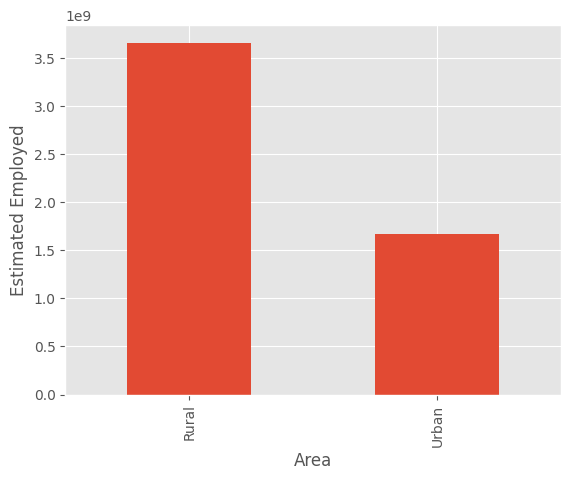

In [17]:
ra = df.groupby('Area')['Estimated Employed'].sum()

ra.plot(kind='bar')
plt.ylabel("Estimated Employed")
plt.show()

In [18]:
print(ra)

Area
Rural    3.659234e+09
Urban    1.672066e+09
Name: Estimated Employed, dtype: float64


The plot above shows that Rural areas have more people who are employed, this could be due to several factors such as 
1. it is possible that the total population in rural areas exceeds that or urban areas. with a larger pool of potential workers.  